# 训练线性模型

## 随机线性数据求解正规方程

In [81]:
import numpy as np

X = 2 * np.random.rand(100, 1) # 生成100个随机数
y= 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3*x + 满足高斯分布的一个噪声, 使得数据集不是完全线性的|

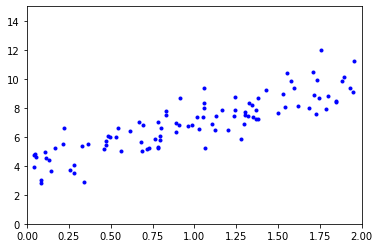

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')
plt.axis([0,2,0,15]) 
plt.show()

In [83]:
# 求解正规方程

X_b = np.c_[np.ones((100, 1)), X] # X里存放的是n个X1, 还需要加上始终为1的X0
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.00786235],
       [2.94907513]])

In [84]:
# 使用求解出来的值进行预测
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.00786235],
       [9.90601261]])

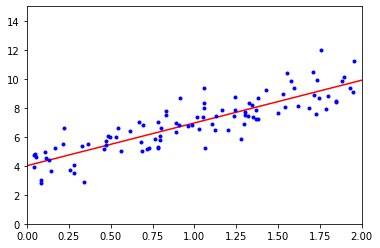

In [85]:
plt.plot(X_new,y_predict,"r")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15]) 
plt.show()

## 多项式回归

In [86]:
# 简单二次方程生成非线性数据

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

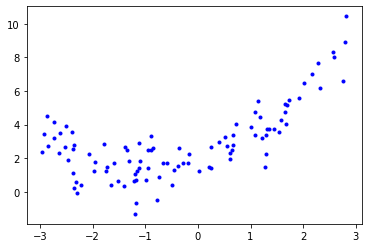

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')
plt.show()

In [88]:
# 将特征的平方作为新特征对数据集进行转换

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[0]

array([-2.07721788,  4.31483413])

In [89]:
# 在新的数据集上进行线性回归

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78697826]), array([[1.03771196, 0.51209848]]))

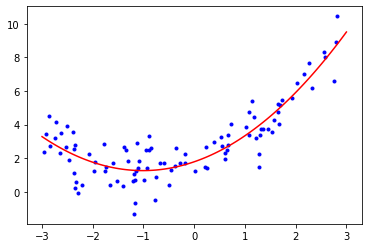

In [90]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1) # 在-3到3之间生成固定间隔的100个数
X_new_poly = poly_features.fit_transform(X_new)
y_pred = lin_reg.predict(X_new_poly)

plt.plot(X, y, 'b.')
plt.plot(X_new, y_pred, 'r-')
plt.show()

## 学习曲线

In [91]:
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split 

def plot_learning_curves(model, X, y):     
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) # 分出20%的验证集
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m]) # 前m个当做训练集
        y_train_predict = model.predict(X_train[:m]) # 
        y_val_predict = model.predict(X_val)         
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))         
        val_errors.append(mean_squared_error(y_val_predict, y_val))     
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")     
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

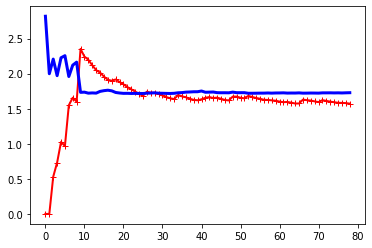

In [92]:
# 线性回归的学习曲线
lin_reg = LinearRegression()

plot_learning_curves(lin_reg, X, y)


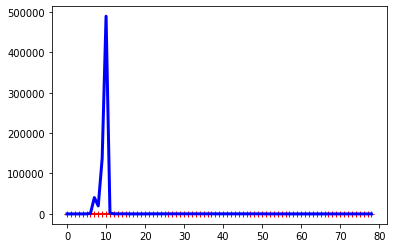

In [93]:
# 10阶多项式模型的学习曲线

from sklearn.pipeline import Pipeline

poly_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression())
))
    
plot_learning_curves(poly_regression, X, y)

## 线性模型的正则化